## Title: Food Inspections
### Brief Description: 
This dataset contains information from inspections of restaurants and other
food establishments in Chicago from January 1, 2010 to the present.
### Description: 
This information is derived from inspections of restaurants and other food establishments in Chicago from January 1, 2010 to the present. Inspections are performed by staff from the Chicago Department of Public Health’s Food Protection Program. Inspections are done using a standardized procedure. The results of the inspection are inputted into a database, then reviewed and approved by a State of Illinois Licensed Environmental Health Practitioner (LEHP). A subset of data elements are extracted from this database and downloaded into this data portal. These elements are:
* **DBA:**  
Doing business as.’ This is legal name of the establishment.
* **AKA:**  
‘Also known as.’ This is the name the public would know the establishment as.
* **License number:**  
This is a unique number assigned to the establishment for the purposes of licensing by the Department of Business Affairs and Consumer Protection.
* **Type of facility:**  
Each establishment is described by one of the following: bakery, banquet hall, candy store, caterer, coffee shop, day care center (for ages less than 2), day care center (for ages 2 – 6), day care center (combo, for ages less than 2 and 2 – 6 combined), gas station, Golden Diner, grocery store, hospital, long term care center(nursing home), liquor store, mobile food dispenser, restaurant, paleteria, school, shelter, tavern, social club, wholesaler, or Wrigley Field Rooftop.
* **Risk category of facility:**  
Each establishment is categorized as to its risk of adversely affecting the public’s health, with **1 being the highest** and **3 the lowest**. The frequency of inspection is tied to this risk, **with risk 1 establishments inspected most frequently and risk 3 least frequently.**
* **Street address, city, state and zip code of facility:**  
This is the complete address where the facility is located.
* **Inspection date:**  
This is the date the inspection occurred. A particular establishment is likely to have multiple inspections which are denoted by different inspection dates.
* **Inspection type:**  
An inspection can be one of the following types: **canvass**, the most common type of inspection performed at a frequency relative to the risk of the establishment; **consultation**, when the inspection is done at the request of the owner prior to the opening of the establishment; **complaint**, when the inspection is done in response to a complaint against the establishment; **license**, when the inspection is done as a requirement for the establishment to receive its license to operate; **suspect food poisoning**, when the inspection is done in response to one or more persons claiming to have gotten ill as a result of eating at the establishment (a specific type of complaint-based inspection); **task-force inspection**, when an inspection of a bar or tavern is done. **Re-inspections can occur for most types of these inspections and are indicated as such**.
* **Results:**  
An inspection can pass, pass with conditions or fail. Establishments receiving a `pass` were found to have no critical or serious violations **(violation number 1-14 and 15- 29, respectively)**. Establishments receiving a `pass with conditions` were found to have critical or serious violations, but these were corrected during the inspection. Establishments receiving a `fail` were found to have critical or serious violations that were not correctable during the inspection. An establishment receiving a ‘fail’ does not necessarily mean the establishment’s licensed is suspended. Establishments found to be out of business or not located are indicated as such.
* **Violations**:  
An establishment can receive one or more of 45 distinct violations (violation numbers 1-44 and 70). For each violation number listed for a given establishment, the requirement the establishment must meet in order for it to NOT receive a violation is noted, followed by a specific description of the findings that caused the violation to be issued. 

## Disclaimer: 
Attempts have been made to minimize any and all duplicate inspection reports. However, the dataset may still contain such duplicates and the appropriate precautions should be exercised when viewing or analyzing these data. The result of the inspections (pass, pass with conditions or fail) as well as the violations noted are based on the findings identified and reported by the inspector at the time of the inspection, and may not reflect the findings noted at other times.
## Data Owner: 
Chicago Department of Public Health
## Time Period: 
2010 - Present
## Frequency: 
This database will be updated with information from new inspections each Friday.

In [1]:
import json
import math
import unidecode
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)

## Chicago

In [2]:
def read_clean_chicago(path):
    features = ['Inspection ID', 'DBA Name', 'AKA Name', 'License #', 'Facility Type', \
            'Risk', 'Address', 'Zip', 'Inspection Date', 'Inspection Type',  \
            'Results', 'Violations', 'Latitude', 'Longitude']
    
    dataset = pd.read_csv(path)[features].drop_duplicates().copy()
    
    def to_lower(x):
        if type(x) == str:
            return x.lower().strip()
        
    def to_int(x):
        if not math.isnan(x):
            return int(x)
        
    dataset['License #'] = dataset['License #'].fillna(-999).astype(int)
    dataset['Zip'] = dataset['Zip'].apply(to_int)
    dataset['AKA Name'][dataset['AKA Name'].isnull()] = dataset['DBA Name'][dataset['AKA Name'].isnull()]
    dataset['Inspection Date'] = dataset['Inspection Date'].apply(lambda x: datetime.strptime(x[:10], '%Y-%m-%d'))
    
    features = ['DBA Name', 'AKA Name', 'Address', 'Violations', 'Facility Type', 'Inspection Type', \
                'Inspection Type']
    for feature in features:
        dataset[feature] = dataset[feature].apply(to_lower)
    
    return dataset.copy()

In [3]:
# Read in chicago food inspection
CHICAGO_PATH = 'chicago-food-inspections/food-inspections.csv'
chicago = read_clean_chicago(CHICAGO_PATH)

print(chicago['AKA Name'].nunique())
print(chicago.shape)
chicago.reset_index(drop=True, inplace=True)
chicago.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


26738
(195524, 14)


,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude
0,2345318,subway,subway,2529116,restaurant,Risk 1 (High),2620 n narragansett ave,60639.0,2019-11-08,canvass re-inspection,Pass w/ Conditions,"3. management, food employee and conditional employee; knowledge, responsibilities and reporting - comments: 2-102.14(o) observed no written employee health policy on the premises. management instructed to have a signed employee health policy for each employee. priority foundation 7-38-010. no citation issued. | 5. procedures for responding to vomiting and diarrheal events - comments: 2-501.11 observed no clean up procedure and supplies on the premises to respond to vomit and diarrheal events. management instructed to provide both. priority foundation 7-38-005. no citation issued. | 58. allergen training as required - comments: 2-102.13 observed the certified food manager without an allergen training certificate. management instructed that all certified food managers must show proof of training.",41.927995,-87.785752
1,2345334,la michoacana ice cream shop,la michoacana ice cream shop,2698396,restaurant,Risk 1 (High),3591-3597 n milwaukee ave,60641.0,2019-11-08,license,Pass w/ Conditions,"3. management, food employee and conditional employee; knowledge, responsibilities and reporting - comments: found no written employee health policy on the premises. management instructed to provide a signed employee health policy for each employee. priority foundation 7-38-010,no citation issued. | 5. procedures for responding to vomiting and diarrheal events - comments: found procedure/plan for responding to vomiting and diarrheal events on site but has in-complete clean-up items/kit. instructed to provide and maintain appropriate supplies or kit. (necessary items at a minimum: gloves, face masks, disposable mops and appropriate sanitizer that kills norovirus).priority foundation violation 7-38-005,no citation issued. - | 51. plumbing installed; proper backflow devices - comments: observed no sink for food preparation at front prep area where fresh fruit squeezed juices,milk shakes,smoothies will be made to order. must install and maintain. | 57. all food employees have food handler training - comments: food handler (s) with no proof of food handler training. instructed to provide. information given.",41.946140,-87.735183
2,2345339,the crepe shop,the crepe shop,2699005,restaurant,Risk 1 (High),2934 n broadway,60657.0,2019-11-08,license,Fail,"10. adequate handwashing sinks properly supplied and accessible - comments: noted no hand wash sink the dish washing area at the rear. additional hand wash sink needed. | 39. contamination prevented during food preparation, storage & display - comments: noted a large open area between the prep area and the customers. instructed to provide a barrier between the prep area and the customer area. | 48. warewashing facilities: installed, maintained & used; test strips - comments: noted premise using a high temperature dish washer with gauge reading 184f; however noted no temperature test strips. instructed to provide and irreversible registering temperature indicator, strips/stickers. priority foundation #7-38-005. no citation issued today. | 51. plumbing installed; proper backflow devices - comments: back flow prevention devices not located at the utility sink. must install back flow prevention devices may be located to be serviced and maintained or have a fixed air gap for the utility sink. | 53. toilet facilities: properly constructed, supplied, & cleaned - comments: noted wash rooms on premise with garbage receptacles and no lids. instructed to provide trash cans with lids at all women wash rooms and unisex wash rooms | 55. physical facilities installed, maintained & clean - comments: noted rough and unfinished brick walls behind the bathroom. instructed to refinish walls to be smooth and easily cleanable.",41.935930,-87.644

In [4]:
def split_violation(data, ):
    lss = list()
    for x in data.Violations:
        sets = set()
        if type(x) == str:
            y = x.split("| ")
            for z in y:
                sets.add(z.split(". ")[0])
        lss.append(sets)
    return lss
        
split = split_violation(chicago)
        
chicago["violation_number"] = pd.Series( (v for v in split) )

In [5]:
chicago.sort_values("Inspection Date",ascending = False,inplace = True)
chicago.reset_index(drop=True, inplace=True)

## violation related analysis

1. 不同的facility type的类别特征，以及不同类别之间常出现的violation类型有没有什么不同，分析原因。

2. 不同的inspection type的类别特征，以及不同类别之间常出现的violation类型有没有什么不同，分析原因。

3. 计算每种violation的重犯率，研究其和出现概率的关系。并根据这两者寻找一些重点研究的violation number

4. For some important violation number generate a word cloud according to comments

5. For each violation, group by 'pass, pass with conditions and fail', which type of violation is the most incorrigible? Which are most easily-correctable?


In [6]:
chicago.Risk.value_counts()

Risk 1 (High)      140164
Risk 2 (Medium)    38173 
Risk 3 (Low)       17085 
All                29    
Name: Risk, dtype: int64

In [7]:
risk1 = chicago[chicago.Risk == 'Risk 1 (High)'].groupby('Facility Type').count()['Risk'].sort_values(ascending=False)

In [8]:
risk2 = chicago[chicago.Risk == 'Risk 2 (Medium)'].groupby('Facility Type').count()['Risk'].sort_values(ascending=False)

In [9]:
risk3 = chicago[chicago.Risk == 'Risk 3 (Low)'].groupby('Facility Type').count()['Risk'].sort_values(ascending=False)

In [11]:
facility_type_percent = pd.DataFrame({'percentage':(chicago['Facility Type'].value_counts()/chicago['Facility Type'].count())*100})
facility_type_percent['cumulative percentage'] = facility_type_percent['percentage'].cumsum()
facility_type_percent.head(20)

,percentage,cumulative percentage
restaurant,68.324727,68.324727
grocery store,13.058272,81.382998
school,6.347217,87.730216
children's services facility,1.610003,89.340219
bakery,1.500433,90.840651
daycare (2 - 6 years),1.409211,92.249862
daycare above and under 2 years,1.240399,93.490262
long term care,0.705654,94.195916
catering,0.624394,94.820310
mobile food dispenser,0.455582,95.275892


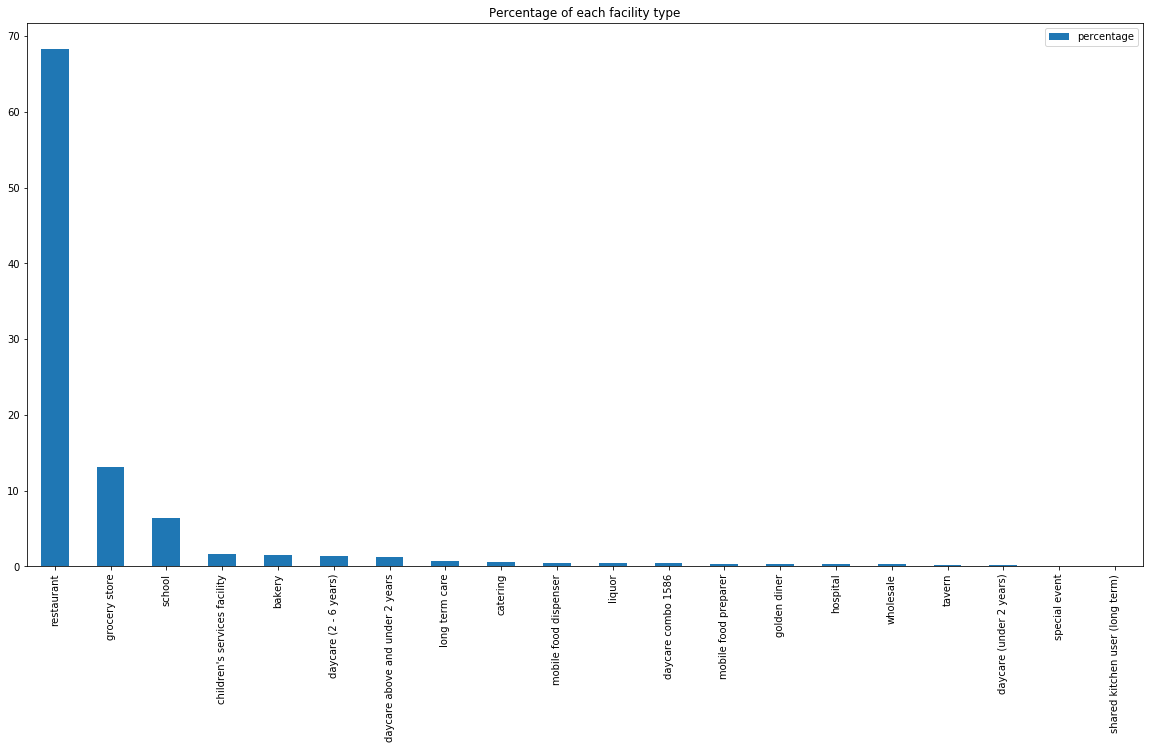

In [12]:
facility_type_percent.iloc[:20].plot(y='percentage', kind='bar', figsize=(20, 10), title='Percentage of each facility type')

In [13]:
valid_facility_type = facility_type_percent.where(facility_type_percent['cumulative percentage'] <= 95).dropna().index.tolist()
valid_facility_type

['restaurant',
 'grocery store',
 'school',
 "children's services facility",
 'bakery',
 'daycare (2 - 6 years)',
 'daycare above and under 2 years',
 'long term care',
 'catering']

In [14]:
inspection_type_percent = pd.DataFrame({'percentage':(chicago['Inspection Type'].value_counts()/chicago['Inspection Type'].count())*100})
inspection_type_percent['cumulative percentage'] = inspection_type_percent['percentage'].cumsum()
inspection_type_percent.head(10)

,percentage,cumulative percentage
canvass,52.814247,52.814247
license,13.230669,66.044915
canvass re-inspection,10.523059,76.567974
complaint,9.272566,85.840540
license re-inspection,4.582070,90.422610
complaint re-inspection,3.854278,94.276888
short form complaint,3.443073,97.719961
suspected food poisoning,0.434220,98.154181
consultation,0.342159,98.496341
license-task force,0.309427,98.805767


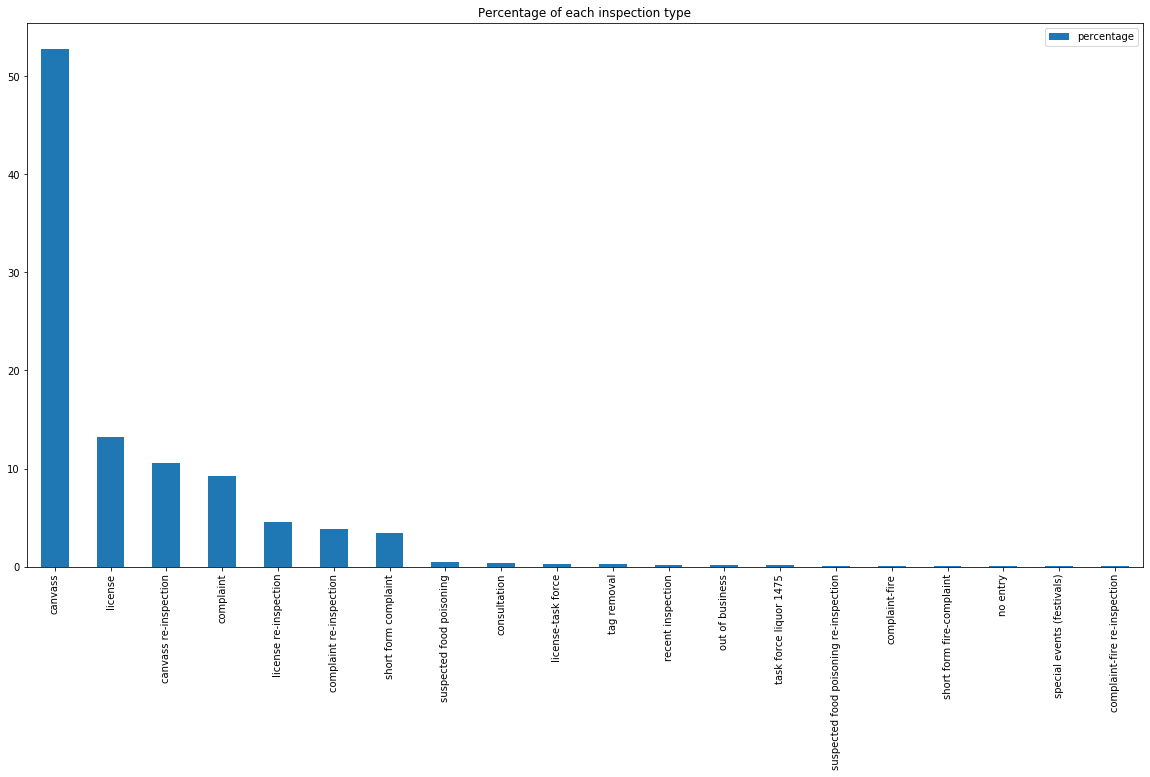

In [15]:
inspection_type_percent.iloc[:20].plot(y='percentage', kind='bar', figsize=(20, 10), title='Percentage of each inspection type')

In [16]:
valid_inspection_type = inspection_type_percent.where(inspection_type_percent['cumulative percentage'] <= 95).dropna().index.tolist()
valid_inspection_type

['canvass',
 'license',
 'canvass re-inspection',
 'complaint',
 'license re-inspection',
 'complaint re-inspection']

In [17]:
facility_type_count = pd.DataFrame({'count':chicago['Facility Type'].value_counts()})
facility_type_count.head()

,count
restaurant,130326
grocery store,24908
school,12107
children's services facility,3071
bakery,2862


In [18]:
valid_facility_extend = facility_type_count.where(facility_type_count['count'] >= 200).dropna().index.tolist()
valid_facility_extend

['restaurant',
 'grocery store',
 'school',
 "children's services facility",
 'bakery',
 'daycare (2 - 6 years)',
 'daycare above and under 2 years',
 'long term care',
 'catering',
 'mobile food dispenser',
 'liquor',
 'daycare combo 1586',
 'mobile food preparer',
 'golden diner',
 'hospital',
 'wholesale',
 'tavern',
 'daycare (under 2 years)',
 'special event']

**generate the new table for analysis**

chicago_before is the table before datetime(2018 7 1)
chicago_after is the table after datetime(2018 7 1)

In [19]:
chicago_new = chicago[['License #', 'Facility Type', 'Inspection Date', 'Inspection Type', 'Violations']].copy()
chicago_new = chicago_new[chicago_new.Violations.isnull()==False]
chicago_new['Violations'] = chicago_new.Violations.apply(lambda x: x.split("| "))
chicago_new = chicago_new.explode('Violations')\
                         .rename(columns={'Violations':'Violation'})\
                         .reset_index(drop=True) \
                         .dropna(subset=['Violation'])
chicago_new.head(3)

,License #,Facility Type,Inspection Date,Inspection Type,Violation
0,2529116,restaurant,2019-11-08,canvass re-inspection,"3. management, food employee and conditional employee; knowledge, responsibilities and reporting - comments: 2-102.14(o) observed no written employee health policy on the premises. management instructed to have a signed employee health policy for each employee. priority foundation 7-38-010. no citation issued."
1,2529116,restaurant,2019-11-08,canvass re-inspection,5. procedures for responding to vomiting and diarrheal events - comments: 2-501.11 observed no clean up procedure and supplies on the premises to respond to vomit and diarrheal events. management instructed to provide both. priority foundation 7-38-005. no citation issued.
2,2529116,restaurant,2019-11-08,canvass re-inspection,58. allergen training as required - comments: 2-102.13 observed the certified food manager without an allergen training certificate. management instructed that all certified food managers must show proof of training.


In [20]:
chicago_new['Violations Number'] = chicago_new.Violation.apply(lambda x: x.split(".")[0])
chicago_new['Regulation'] = chicago_new.Violation.apply(lambda x: x.split(" - comments: ")[0].strip())
chicago_new['Comment'] = chicago_new.Violation.apply(lambda x: x.split("comments: ")[-1].strip())
chicago_new.head(3)

,License #,Facility Type,Inspection Date,Inspection Type,Violation,Violations Number,Regulation,Comment
0,2529116,restaurant,2019-11-08,canvass re-inspection,"3. management, food employee and conditional employee; knowledge, responsibilities and reporting - comments: 2-102.14(o) observed no written employee health policy on the premises. management instructed to have a signed employee health policy for each employee. priority foundation 7-38-010. no citation issued.",3,"3. management, food employee and conditional employee; knowledge, responsibilities and reporting",2-102.14(o) observed no written employee health policy on the premises. management instructed to have a signed employee health policy for each employee. priority foundation 7-38-010. no citation issued.
1,2529116,restaurant,2019-11-08,canvass re-inspection,5. procedures for responding to vomiting and diarrheal events - comments: 2-501.11 observed no clean up procedure and supplies on the premises to respond to vomit and diarrheal events. management instructed to provide both. priority foundation 7-38-005. no citation issued.,5,5. procedures for responding to vomiting and diarrheal events,2-501.11 observed no clean up procedure and supplies on the premises to respond to vomit and diarrheal events. management instructed to provide both. priority foundation 7-38-005. no citation issued.
2,2529116,restaurant,2019-11-08,canvass re-inspection,58. allergen training as required - comments: 2-102.13 observed the certified food manager without an allergen training certificate. management instructed that all certified food managers must show proof of training.,58,58. allergen training as required,2-102.13 observed the certified food manager without an allergen training certificate. management instructed that all certified food managers must show proof of training.


In [21]:
chicago_before = chicago_new[chicago_new['Inspection Date'] < datetime(2018, 7, 1)].copy()
chicago_after = chicago_new[chicago_new['Inspection Date'] >= datetime(2018, 7, 1)].copy()

In [22]:
Regulation = chicago_before[['Violations Number', 'Regulation']]
regulation_old = Regulation.drop_duplicates(subset=['Regulation']).copy()
regulation_old['Violations Number'] = regulation_old['Violations Number'].astype(int)
regulation_old = regulation_old.sort_values(by=['Violations Number']).reset_index(drop=True)
regulation_old

,Violations Number,Regulation
0,1,"1. source sound condition, no spoilage, foods properly labeled, shellfish tags in place"
1,2,2. facilities to maintain proper temperature
2,3,"3. potentially hazardous food meets temperature requirement during storage, preparation display and service"
3,4,"4. source of cross contamination controlled i.e. cutting boards, food handlers, utensils, etc"
4,5,"5. personnel with infections restricted: no open sores, wounds, etc"
5,6,"6. hands washed and cleaned, good hygienic practices; no bare hand contact with ready-to-eat foods."
6,7,7. wash and rinse water: clean and proper temperature
7,8,"8. sanitizing rinse for equipment and utensils: clean, proper temperature, concentration, exposure time"
8,9,"9. water source: safe, hot & cold under city pressure"
9,10,"10. sewage and waste water disposal, no back siphonage, cross connection and/or back flow"


In [23]:
Regulation = chicago_after[['Violations Number', 'Regulation']]
regulation_new = Regulation.drop_duplicates(subset=['Regulation']).copy()
regulation_new['Violations Number'] = regulation_new['Violations Number'].astype(int)
regulation_new = regulation_new.sort_values(by=['Violations Number']).reset_index(drop=True)
regulation_new

,Violations Number,Regulation
0,1,"1. person in charge present, demonstrates knowledge, and performs duties"
1,2,2. city of chicago food service sanitation certificate
2,3,"3. management, food employee and conditional employee; knowledge, responsibilities and reporting"
3,4,4. proper use of restriction and exclusion
4,5,5. procedures for responding to vomiting and diarrheal events
5,6,"6. proper eating, tasting, drinking, or tobacco use"
6,7,"7. no discharge from eyes, nose, and mouth"
7,8,8. hands clean & properly washed
8,9,9. no bare hand contact with rte food or a pre-approved alternative procedure properly allowed
9,10,10. adequate handwashing sinks properly supplied and accessible


In [24]:
chicago_before.shape

(521513, 8)

In [25]:
chicago_after.shape

(110453, 8)

**1. 不同的 facility type 最常出现的violation 类型 和    出现的comment 容易出现和重返率**

**generate a table with only facility type in valid facility type**

## Before and after 2018 July 1

In [26]:
def get_stats_info(valid_type, original_table, type_='Facility Type'):
    # select rows with valid type
    valid_table = original_table[original_table[type_].isin(valid_type)]
    stats = valid_table.groupby(type_)['Violations Number']\
                       .apply(lambda x: x.value_counts())\
                       .unstack()\
                       .fillna(0.0)
    # sort the row according to the valid Type sequence
    stats =stats.loc[valid_type, :]
    
    # add a row to record the information of the sum for each column
    stats.loc['total'] = stats.sum(axis=0)
    
    # sort the column according to the violation number from small to big
    sorted_name = sorted(stats.columns.astype(int))
    stats= stats.reindex([str(i) for i in sorted_name], axis=1)
    
    # get the percentage of the each violation number for each type(facility type or inspection type)
    stats_percentage = stats.apply(lambda x: round((x/x.sum())*100, 3), axis=1)
    # get the sorted version
    column = stats_percentage.columns.values
    y = [list(zip(stats_percentage.loc[y], column)) for y in valid_type]
    [x.sort(reverse=True) for x in y]
    stats_percentage_sorted = pd.DataFrame(y, index=valid_type)
    
    # get the ratio of violation number of each type compared to the average one
    stats_ratio = stats_percentage.apply(lambda x: x/x[-1])
    
    return stats, stats_percentage, stats_percentage_sorted, stats_ratio

In [27]:
# get statistic result for valid facilty before change food rules
stats_facility_b_e, stats_percentage_facility_b_e, stats_percentage_sorted_facility_b_e, stats_ratio_facility_b_e\
    = get_stats_info(valid_facility_extend, chicago_before, 'Facility Type')

# get statistic result for valid facilty before change food rules
stats_facility_a_e, stats_percentage_facility_a_e, stats_percentage_sorted_facility_a_e, stats_ratio_facility_a_e\
    = get_stats_info(valid_facility_extend, chicago_after, 'Facility Type')

# get statistic result for valid facilty before change food rules
stats_inspection_b_e, stats_percentage_inspection_b_e, stats_percentage_sorted_inspection_b_e, stats_ratio_inspection_b_e\
    = get_stats_info(valid_inspection_type, chicago_before, 'Inspection Type')

# get statistic result for valid facilty before change food rules
stats_inspection_a_e, stats_percentage_inspection_a_e, stats_percentage_sorted_inspection_a_e, stats_ratio_inspection_a_e\
    = get_stats_info(valid_inspection_type, chicago_after, 'Inspection Type')

## use k mean to cluster the different facility type

In [29]:
stats_facility_k_mean = pd.concat([stats_facility_b_e, stats_facility_a_e], axis=1)
stats_facility_k_mean = stats_facility_k_mean.fillna(0.0)
stats_facility_k_mean = stats_facility_k_mean.apply(lambda x: round((x/x.sum())*100, 2), axis=1)
# stats_facility_k_mean = stats_facility_k_mean.reset_index()

stats_inspection_k_mean = pd.concat([stats_inspection_b_e, stats_inspection_a_e], axis=1)
stats_inspection_k_mean = stats_inspection_k_mean.fillna(0.0)
stats_inspection_k_mean = stats_inspection_k_mean.apply(lambda x: round((x/x.sum())*100, 2), axis=1)
# stats_inspection_k_mean = stats_inspection_k_mean.reset_index()

In [31]:
import numpy as np
pd.DataFrame(np.corrcoef(stats_inspection_k_mean.values))

,0,1,2,3,4,5,6
0,1.000000,0.934540,0.980218,0.995791,0.922055,0.986950,0.998466
1,0.934540,1.000000,0.934619,0.932373,0.976196,0.928216,0.951128
2,0.980218,0.934619,1.000000,0.966179,0.948953,0.995573,0.985068
3,0.995791,0.932373,0.966179,1.000000,0.907454,0.976807,0.994257
4,0.922055,0.976196,0.948953,0.907454,1.000000,0.934246,0.939554
5,0.986950,0.928216,0.995573,0.976807,0.934246,1.000000,0.989431
6,0.998466,0.951128,0.985068,0.994257,0.939554,0.989431,1.000000


1
120.8257142857143
[0 0 0 0 0 0 0]
(array([0, 1, 2, 3, 4, 5, 6], dtype=int64),)

2
42.68376
[1 0 1 1 0 1 1]
(array([1, 4], dtype=int64),)
(array([0, 2, 3, 5, 6], dtype=int64),)

3
20.311149999999998
[2 1 0 2 1 0 2]
(array([2, 5], dtype=int64),)
(array([1, 4], dtype=int64),)
(array([0, 3, 6], dtype=int64),)

4
6.937549999999998
[0 3 2 0 1 2 0]
(array([0, 3, 6], dtype=int64),)
(array([4], dtype=int64),)
(array([2, 5], dtype=int64),)
(array([1], dtype=int64),)

5
3.251849999999997
[4 1 0 2 3 0 4]
(array([2, 5], dtype=int64),)
(array([1], dtype=int64),)
(array([3], dtype=int64),)
(array([4], dtype=int64),)
(array([0, 6], dtype=int64),)

6
0.8692999999999991
[1 2 3 4 0 5 1]
(array([4], dtype=int64),)
(array([0, 6], dtype=int64),)
(array([1], dtype=int64),)
(array([2], dtype=int64),)
(array([3], dtype=int64),)
(array([5], dtype=int64),)

7
0.0
[6 1 3 4 2 5 0]
(array([6], dtype=int64),)
(array([1], dtype=int64),)
(array([4], dtype=int64),)
(array([2], dtype=int64),)
(array([3], dtype=int64),

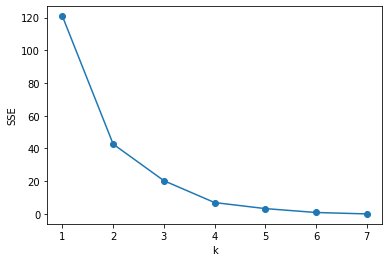

In [32]:
from sklearn.cluster import KMeans

data = stats_inspection_k_mean.values[0:7,:]  

SSE = []
X = []

for i in range(7):
    kms = KMeans(n_clusters = i + 1)
    predicted_labels = kms.fit_predict(data)
    print(i + 1)
    print(kms.inertia_)
    SSE.append(kms.inertia_)
    X.append(i + 1)
    print(predicted_labels)
    for j in range(i + 1):
        print(np.where(predicted_labels == j))
    print()
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.show()

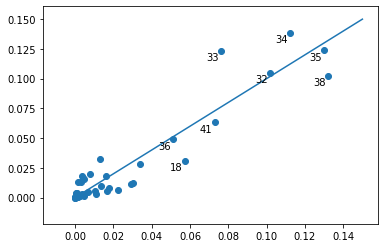

In [33]:
license = stats_inspection_b_e.iloc[[1,4], :]
license= license.apply(lambda x: x.sum(),axis = 0)
sum_license = np.sum(license)
license = license/sum_license

other = stats_inspection_b_e.iloc[[0, 2, 3, 5, 6], :]
other = other.apply(lambda x: x.sum(),axis = 0)
sum_other = np.sum(other)
other = other/sum_other

text = license._stat_axis.values.tolist()

import matplotlib.pyplot as plt

# total.plot.scatter(x = 'license', y = 'other')

plt.scatter(license, other)
for i in range(len(license)):
    if(license[i] >= 0.05):
        plt.annotate(text[i], xy = (license[i], other[i]), xytext = (license[i] - 0.008, other[i] - 0.008))
plt.plot([0, 0.15],[0, 0.15])
plt.show()

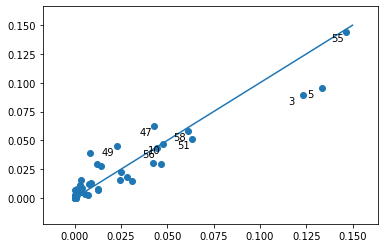

In [34]:
license = stats_inspection_a_e.iloc[[1,4], :]
license= license.apply(lambda x: x.sum(),axis = 0)
sum_license = np.sum(license)
license = license/sum_license

other = stats_inspection_a_e.iloc[[0, 2, 3, 5, 6], :]
other = other.apply(lambda x: x.sum(),axis = 0)
sum_other = np.sum(other)
other = other/sum_other

text = license._stat_axis.values.tolist()

import matplotlib.pyplot as plt

# total.plot.scatter(x = 'license', y = 'other')

plt.scatter(license, other)
for i in range(len(license)):
    if(other[i] >= 0.04):
        plt.annotate(text[i], xy = (license[i], other[i]), xytext = (license[i] - 0.008, other[i] - 0.008))
plt.plot([0, 0.15],[0, 0.15])
plt.show()

#解释一下 before：33，34，38，18。 after：49，47，3，5

1
1269.8950210526318
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18], dtype=int64),)

2
729.2313852941177
[1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1]
(array([ 9, 12], dtype=int64),)
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 13, 14, 15, 16, 17, 18],
      dtype=int64),)

3
558.874651388889
[2 0 0 2 2 0 0 2 2 1 0 0 1 2 2 0 0 0 2]
(array([ 1,  2,  5,  6, 10, 11, 15, 16, 17], dtype=int64),)
(array([ 9, 12], dtype=int64),)
(array([ 0,  3,  4,  7,  8, 13, 14, 18], dtype=int64),)

4
463.7671482142857
[3 0 0 3 3 0 0 3 3 1 2 0 1 3 3 0 2 0 3]
(array([ 1,  2,  5,  6, 11, 15, 17], dtype=int64),)
(array([ 9, 12], dtype=int64),)
(array([10, 16], dtype=int64),)
(array([ 0,  3,  4,  7,  8, 13, 14, 18], dtype=int64),)

5
372.3940888888889
[0 0 3 0 0 3 3 0 0 2 4 3 1 0 0 3 4 3 0]
(array([ 0,  1,  3,  4,  7,  8, 13, 14, 18], dtype=int64),)
(array([12], dtype=int64),)
(array([9], dtype=int64),)
(array([ 2,  5,  6, 11, 

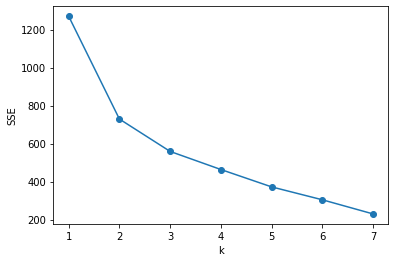

In [35]:
from sklearn.cluster import KMeans

data = stats_facility_k_mean.values[0:19,:]  

SSE = []
X = []

for i in range(7):
    kms = KMeans(n_clusters = i + 1)
    predicted_labels = kms.fit_predict(data)
    print(i + 1)
    print(kms.inertia_)
    SSE.append(kms.inertia_)
    X.append(i + 1)
    print(predicted_labels)
    for j in range(i + 1):
        print(np.where(predicted_labels == j))
    print()
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.show()

In [36]:
valid_facility = pd.Series(valid_facility_extend)
# after doing k means
# [9, 12] mo
# [10, 16] jiu
# [ 2,  5,  6, 11, 15, 17] day+pifa
# [ 0,  1,  3,  4,  7,  8, 13, 14, 18]
mobile = valid_facility.iloc[[9,12]]
liquor_tavern = valid_facility.iloc[[10,16]]
daycare = valid_facility.iloc[[2,  5,  6, 11, 15, 17]]
restaurant = valid_facility.iloc[[ 0,  1,  3,  4,  7,  8, 13, 14, 18]]
print(mobile.values,'\n=======================')
print(liquor_tavern.values,'\n=======================')
print(daycare.values,'\n=======================')
print(restaurant.values,'\n=======================')

['mobile food dispenser' 'mobile food preparer'] 
['liquor' 'tavern'] 
['school' 'daycare (2 - 6 years)' 'daycare above and under 2 years'
 'daycare combo 1586' 'wholesale' 'daycare (under 2 years)'] 
['restaurant' 'grocery store' "children's services facility" 'bakery'
 'long term care' 'catering' 'golden diner' 'hospital' 'special event'] 


In [37]:
facility_concat = pd.concat([mobile, liquor_tavern, daycare, restaurant])
facility_concat

9     mobile food dispenser          
12    mobile food preparer           
10    liquor                         
16    tavern                         
2     school                         
5     daycare (2 - 6 years)          
6     daycare above and under 2 years
11    daycare combo 1586             
15    wholesale                      
17    daycare (under 2 years)        
0     restaurant                     
1     grocery store                  
3     children's services facility   
4     bakery                         
7     long term care                 
8     catering                       
13    golden diner                   
14    hospital                       
18    special event                  
dtype: object

In [38]:
stats_percentage_sorted_facility_b_e_concat =stats_percentage_sorted_facility_b_e.loc[facility_concat, :]
stats_percentage_sorted_facility_b_e_concat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
mobile food dispenser,"(11.506, 30)","(10.227, 38)","(10.227, 32)","(10.085, 2)","(8.523, 18)","(5.824, 9)","(5.398, 11)","(5.114, 10)","(4.972, 35)","(4.83, 34)","(3.977, 40)","(2.699, 33)","(2.415, 12)","(1.847, 16)","(1.847, 1)","(1.42, 24)","(1.278, 36)","(1.136, 41)","(0.994, 31)","(0.994, 3)","(0.852, 29)","(0.852, 21)","(0.71, 20)","(0.426, 19)","(0.284, 8)","(0.284, 45)","(0.284, 43)","(0.142, 7)","(0.142, 6)","(0.142, 42)","(0.142, 39)","(0.142, 37)","(0.142, 26)","(0.142, 14)","(0.0, 70)","(0.0, 5)","(0.0, 44)","(0.0, 4)","(0.0, 28)","(0.0, 27)","(0.0, 25)","(0.0, 23)","(0.0, 22)","(0.0, 17)","(0.0, 15)","(0.0, 13)"
mobile food preparer,"(11.591, 32)","(9.618, 38)","(9.248, 18)","(8.138, 35)","(7.768, 9)","(7.275, 33)","(6.658, 34)","(6.165, 30)","(5.055, 2)","(3.699, 21)","(3.453, 40)","(2.959, 24)","(2.589, 16)","(2.343, 45)","(2.219, 36)","(1.726, 3)","(1.233, 10)","(1.11, 42)","(1.11, 22)","(0.863, 41)","(0.863, 12)","(0.863, 1)","(0.74, 31)","(0.617, 6)","(0.617, 29)","(0.617, 20)","(0.37, 28)","(0.247, 19)","(0.123, 43)","(0.123, 11)","(0.0, 8)","(0.0, 70)","(0.0, 7)","(0.0, 5)","(0.0, 44)","(0.0, 4)","(0.0, 39)","(0.0, 37)","(0.0, 27)","(0.0, 26)","(0.0, 25)","(0.0, 23)","(0.0, 17)","(0.0, 15)","(0.0, 14)","(0.0, 13)"
liquor,"(13.913, 34)","(13.548, 38)","(11.908, 35)","(9.781, 18)","(8.688, 32)","(8.566, 33)","(8.08, 41)","(3.159, 11)","(2.552, 37)","(2.309, 36)","(2.066, 24)","(2.066, 16)","(1.762, 19)","(1.519, 43)","(1.154, 12)","(1.033, 8)","(1.033, 2)","(0.911, 26)","(0.851, 70)","(0.79, 40)","(0.486, 9)","(0.486, 13)","(0.425, 31)","(0.425, 22)","(0.425, 10)","(0.304, 4)","(0.304, 30)","(0.304, 29)","(0.304, 27)","(0.243, 42)","(0.122, 3)","(0.122, 21)","(0.122, 1)","(0.061, 39)","(0.061, 28)","(0.061, 25)","(0.061, 14)","(0.0, 7)","(0.0, 6)","(0.0, 5)","(0.0, 45)","(0.0, 44)","(0.0, 23)","(0.0, 20)","(0.0, 17)","(0.0, 15)"
tavern,"(13.567, 34)","(12.865, 38)","(10.877, 33)","(10.526, 35)","(9.474, 32)","(9.357, 41)","(9.123, 18)","(4.561, 37)","(2.807, 36)","(2.573, 16)","(2.105, 43)","(1.988, 11)","(1.52, 12)","(1.287, 19)","(1.053, 40)","(0.702, 4)","(0.702, 24)","(0.702, 14)","(0.585, 42)","(0.585, 26)","(0.351, 9)","(0.351, 8)","(0.351, 45)","(0.234, 70)","(0.234, 29)","(0.234, 28)","(0.234, 27)","(0.234, 20)","(0.234, 2)","(0.117, 30)","(0.117, 25)","(0.117, 22)","(0.117, 21)","(0.117, 10)","(0.0, 7)","(0.0, 6)","(0.0, 5)","(0.0, 44)","(0.0, 39)","(0.0, 31)","(0.0, 3)","(0.0, 23)","(0.0, 17)","(0.0, 15)","(0.0, 13)","(0.0, 1)"
school,"(17.47, 35)","(16.466, 38)","(15.054, 34)","(9.547, 33)","(9.273, 32)","(8.5, 41)","(6.04, 36)","(3.538, 18)","(1.562, 40)","(1.459, 26)","(1.141, 29)","(1.016, 19)","(0.944, 37)","(0.851, 21)","(0.767, 31)","(0.748, 30)","(0.708, 14)","(0.686, 3)","(0.499, 2)","(0.48, 27)","(0.377, 11)","(0.333, 24)","(0.327, 42)","(0.309, 43)","(0.296, 12)","(0.234, 9)","(0.231, 16)","(0.196, 8)","(0.193, 45)","(0.171, 13)","(0.156, 44)","(0.084, 6)","(0.072, 10)","(0.059, 28)","(0.047, 22)","(0.041, 39)","(0.031, 4)","(0.025, 25)","(0.022, 7)","(0.019, 70)","(0.019, 17)","(0.006, 1)","(0.003, 5)","(0.003, 20)","(0.0, 23)","(0.0, 15)"
daycare (2 - 6 years),"(16.175, 34)","(16.119, 35)","(12.606, 38)","(10.934, 41)","(10.295, 33)","(7.853, 32)","(5.429, 36)","(4.302, 18)","(2.405, 21)","(2.348, 40)","(1.954, 37)","(0.996, 31)","(0.883, 30)","(0.789, 29)","(0.695, 24)","(0.601, 19)","(0.582, 26)","(0.582, 14)","(0.488, 8)","(0.47, 2)","(0.47, 11)","(0.432, 9)","(0.432, 12)","(0.376, 3)","(0.357, 42)","(0.263, 45)","(0.169, 22)","(0.169, 13)","(0.15, 43)","(0.113, 16)","(0.094, 39)","(0.075, 6)","(0.075, 28)","(0.075, 27)","(0.056, 10)","(0.056, 1)","(0.038, 7)","(0.038, 20)","(0.019, 70)","(0.019, 44)","(0.019, 25)","(0.0, 5)","(0.0, 4)","(0.0, 23)","(0.0, 17)","(0.0, 15)"
daycare above and under 2 years,"(17.768, 35)","(15.157, 34)","(12.872, 38)","(10.261

In [39]:
def decide_cluster_type(x):
    if(x in mobile.values):
        return "mobile"
    elif(x in liquor_tavern.values):
        return "liquor_tavern"
    elif(x in daycare.values):
        return "daycare"
    elif(x in restaurant.values):
        return "border_restaurant"
    else:
        return "unknown"

In [40]:
print(chicago_new.shape, chicago_before.shape, chicago_after.shape)

(631966, 8) (521513, 8) (110453, 8)


In [41]:
chicago_before['Cluster Type'] = chicago_before.apply(lambda x: decide_cluster_type(x['Facility Type']), axis=1)
chicago_after['Cluster Type'] = chicago_after.apply(lambda x: decide_cluster_type(x['Facility Type']), axis=1)

In [48]:
# get statistic result for valid facilty before change food rules
stats_cluster_b, stats_percentage_cluster_b, stats_percentage_sorted_cluster_b, stats_ratio_cluster_b\
    = get_stats_info(["mobile", "liquor_tavern", "daycare", "border_restaurant"], chicago_before, 'Cluster Type')

# get statistic result for valid facilty after change food rules
stats_cluster_a, stats_percentage_cluster_a, stats_percentage_sorted_cluster_a, stats_ratio_cluster_a\
    = get_stats_info(["mobile", "liquor_tavern", "daycare", "border_restaurant"], chicago_after, 'Cluster Type')

In [52]:
stats_cluster_b

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,70
Cluster Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
mobile,20.0,112.0,21.0,0.0,0.0,6.0,1.0,2.0,104.0,46.0,39.0,24.0,0.0,1.0,0.0,34.0,0.0,135.0,5.0,10.0,36.0,9.0,0.0,34.0,0.0,1.0,0.0,3.0,11.0,131.0,13.0,166.0,78.0,88.0,101.0,27.0,1.0,150.0,1.0,56.0,15.0,10.0,3.0,0.0,21.0,0.0
liquor_tavern,2.0,19.0,2.0,11.0,0.0,0.0,0.0,20.0,11.0,8.0,69.0,32.0,8.0,7.0,0.0,56.0,0.0,239.0,40.0,2.0,3.0,8.0,0.0,40.0,2.0,20.0,7.0,3.0,7.0,6.0,7.0,224.0,234.0,345.0,286.0,62.0,81.0,333.0,1.0,22.0,213.0,9.0,43.0,0.0,3.0,16.0
daycare,14.0,289.0,296.0,12.0,1.0,41.0,13.0,123.0,158.0,43.0,210.0,175.0,87.0,287.0,0.0,99.0,8.0,1742.0,449.0,5.0,595.0,49.0,0.0,223.0,16.0,546.0,164.0,27.0,445.0,348.0,414.0,4006.0,4369.0,6930.0,7860.0,2624.0,600.0,6974.0,23.0,861.0,4107.0,190.0,120.0,54.0,94.0,15.0
border_restaurant,622.0,5762.0,8585.0,484.0,15.0,1778.0,131.0,2459.0,1345.0,747.0,3161.0,2735.0,530.0,1293.0,2.0,4927.0,120.0,14518.0,3700.0,89.0,8562.0,1048.0,5.0,2864.0,154.0,831.0,217.0,1369.0,5571.0,15569.0,9343.0,49599.0,57234.0,63184.0,55414.0,22539.0,6045.0,45743.0,632.0,13781.0,28366.0,6145.0,7920.0,338.0,7313.0,546.0
total,658.0,6182.0,8904.0,507.0,16.0,1825.0,145.0,2604.0,1618.0,844.0,3479.0,2966.0,625.0,1588.0,2.0,5116.0,128.0,16634.0,4194.0,106.0,9196.0,1114.0,5.0,3161.0,172.0,1398.0,388.0,1402.0,6034.0,16054.0,9777.0,53995.0,61915.0,70547.0,63661.0,25252.0,6727.0,53200.0,657.0,14720.0,32701.0,6354.0,8086.0,392.0,7431.0,577.0


In [167]:
stats_cluster_b

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,70
Cluster Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
mobile,20.0,112.0,21.0,0.0,0.0,6.0,1.0,2.0,104.0,46.0,39.0,24.0,0.0,1.0,0.0,34.0,0.0,135.0,5.0,10.0,36.0,9.0,0.0,34.0,0.0,1.0,0.0,3.0,11.0,131.0,13.0,166.0,78.0,88.0,101.0,27.0,1.0,150.0,1.0,56.0,15.0,10.0,3.0,0.0,21.0,0.0
liquor_tavern,2.0,19.0,2.0,11.0,0.0,0.0,0.0,20.0,11.0,8.0,69.0,32.0,8.0,7.0,0.0,56.0,0.0,239.0,40.0,2.0,3.0,8.0,0.0,40.0,2.0,20.0,7.0,3.0,7.0,6.0,7.0,224.0,234.0,345.0,286.0,62.0,81.0,333.0,1.0,22.0,213.0,9.0,43.0,0.0,3.0,16.0
daycare,14.0,289.0,296.0,12.0,1.0,41.0,13.0,123.0,158.0,43.0,210.0,175.0,87.0,287.0,0.0,99.0,8.0,1742.0,449.0,5.0,595.0,49.0,0.0,223.0,16.0,546.0,164.0,27.0,445.0,348.0,414.0,4006.0,4369.0,6930.0,7860.0,2624.0,600.0,6974.0,23.0,861.0,4107.0,190.0,120.0,54.0,94.0,15.0
border_restaurant,622.0,5762.0,8585.0,484.0,15.0,1778.0,131.0,2459.0,1345.0,747.0,3161.0,2735.0,530.0,1293.0,2.0,4927.0,120.0,14518.0,3700.0,89.0,8562.0,1048.0,5.0,2864.0,154.0,831.0,217.0,1369.0,5571.0,15569.0,9343.0,49599.0,57234.0,63184.0,55414.0,22539.0,6045.0,45743.0,632.0,13781.0,28366.0,6145.0,7920.0,338.0,7313.0,546.0
total,658.0,6182.0,8904.0,507.0,16.0,1825.0,145.0,2604.0,1618.0,844.0,3479.0,2966.0,625.0,1588.0,2.0,5116.0,128.0,16634.0,4194.0,106.0,9196.0,1114.0,5.0,3161.0,172.0,1398.0,388.0,1402.0,6034.0,16054.0,9777.0,53995.0,61915.0,70547.0,63661.0,25252.0,6727.0,53200.0,657.0,14720.0,32701.0,6354.0,8086.0,392.0,7431.0,577.0


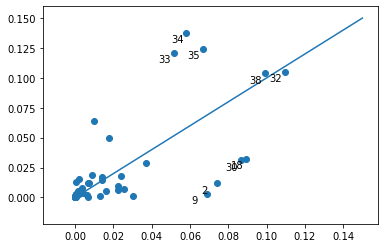

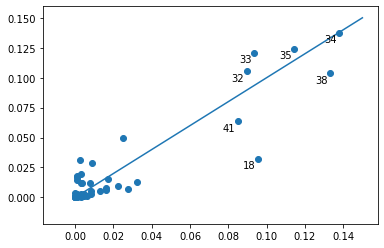

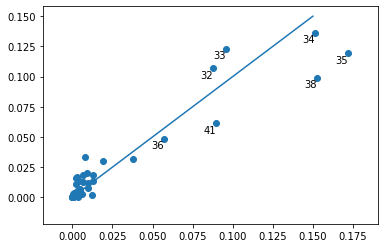

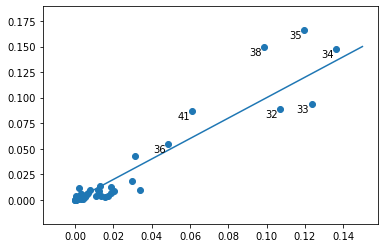

In [176]:
for i in range(4):
    Pick = stats_cluster_b.iloc[[i], :]
    Pick= Pick.apply(lambda x: x.sum(),axis = 0)
    sum_Pick = np.sum(Pick)
    Pick = Pick/sum_Pick

    other = pd.DataFrame(stats_cluster_b.iloc[[4], :].values - stats_cluster_b.iloc[[i], :].values)
    other = other.apply(lambda x: x.sum(),axis = 0)
    sum_other = np.sum(other)
    other = other/sum_other

    text = Pick._stat_axis.values.tolist()

    import matplotlib.pyplot as plt

    # total.plot.scatter(x = 'license', y = 'other')

    plt.scatter(Pick, other)
    for j in range(len(Pick)):
        if(Pick[j] >= 0.04):
            plt.annotate(text[j], xy = (Pick[j], other[j]), xytext = (Pick[j] - 0.008, other[j] - 0.008))
    plt.plot([0, 0.15],[0, 0.15])
    plt.show()

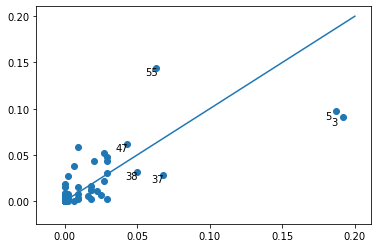

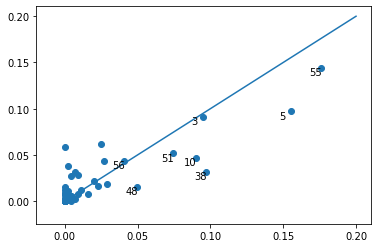

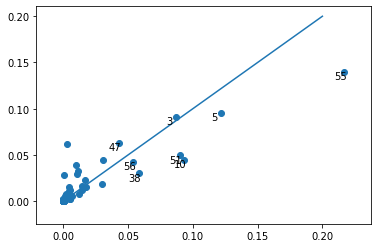

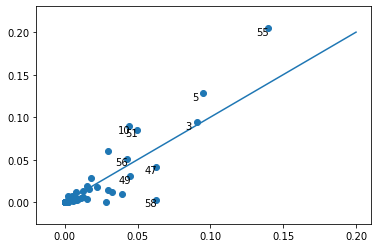

In [181]:
for i in range(4):
    Pick = stats_cluster_a.iloc[[i], :]
    Pick= Pick.apply(lambda x: x.sum(),axis = 0)
    sum_Pick = np.sum(Pick)
    Pick = Pick/sum_Pick

    other = pd.DataFrame(stats_cluster_a.iloc[[4], :].values - stats_cluster_a.iloc[[i], :].values)
    other = other.apply(lambda x: x.sum(),axis = 0)
    sum_other = np.sum(other)
    other = other/sum_other

    text = Pick._stat_axis.values.tolist()

    import matplotlib.pyplot as plt

    # total.plot.scatter(x = 'license', y = 'other')

    plt.scatter(Pick, other)
    for j in range(len(Pick)):
        if(Pick[j] >= 0.04):
            plt.annotate(text[j], xy = (Pick[j], other[j]), xytext = (Pick[j] - 0.008, other[j] - 0.008))
    plt.plot([0, 0.2],[0, 0.2])
    plt.show()

In [59]:
def cal(chicago_):
    max_size = 100
    times = np.zeros(max_size)
    Not_corrected = np.zeros(max_size)
    sum_1 = np.zeros(max_size)
    sum_2 = np.zeros(max_size)
    chicago_loced = chicago_.loc[:, "violation_number"]
    chicago_grouped = chicago_loced.groupby(chicago_['License #'])
    for name,group in chicago_grouped:
        mat = None
        if name == -999:
            continue
        if name == 0:
            continue
        
#     if name >= 500:
#         break
#     print (name)
#     print (group)
        for i in list(group):
            col = np.array(list(i))
            size = col.size
            row = np.zeros(size)
            data = np.ones(size)
            a = csr_matrix((data, (row, col)), shape=(1, max_size)).toarray()
            if mat is None:
                mat = a
            else:
                mat = np.vstack((a, mat))
        if mat.shape[0] > 1:
            mat_1 = np.delete(mat, mat.shape[0]-1, axis = 0)
            mat_2 = np.delete(mat, 0, axis = 0)
            mat_3 = np.logical_and(mat_1, mat_2)
            sum_1 = np.sum(mat_1,axis=0)
            sum_2 = np.sum(mat_3,axis=0)
        times = times + sum_1
        Not_corrected = Not_corrected + sum_2
        sum_1 = np.zeros(max_size)
        sum_2 = np.zeros(max_size)
    return Not_corrected/times
#     print(Not_corrected/times)
#     print(np.where(Not_corrected/times>0.5))
#     print(mat[0])
#     print(mat_1[0])
#     print(mat_2[0])
#     print(mat_3[0])
#     print(sum_1)
#     print(sum_2)
#     print(sum_2/sum_1)
# print(times)
# print(Not_corrected)

In [61]:
from scipy.sparse import csr_matrix
import numpy as np

before = chicago[chicago['Inspection Date'] < datetime(2018, 7, 1)].copy()
after = chicago[chicago['Inspection Date'] >= datetime(2018, 7, 1)].copy()

before_data = cal(before)
print(before_data)

after_data = cal(after)
print(after_data)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


[       nan 0.04133545 0.06526385 0.08335307 0.03571429 0.
 0.0228739  0.03649635 0.05031696 0.06305732 0.09371147 0.0619495
 0.03293201 0.32736156 0.10589014 0.         0.06510417 0.00847458
 0.07832226 0.06157163 0.05660377 0.17765908 0.03996283 0.
 0.08436019 0.01197605 0.06623932 0.06366048 0.03243243 0.09798367
 0.29093735 0.23372523 0.47330426 0.51452721 0.53943552 0.51862725
 0.34675596 0.22738114 0.44185949 0.16554054 0.23279426 0.36268667
 0.1892484  0.23537199 0.20821918 0.28823705        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.05202312        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan 

In [69]:
before_data[46] = before_data[70]
before_data = before_data[1:47]

In [74]:
after_data = after_data[1:64]

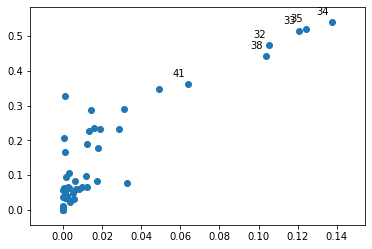

In [139]:
before_percentage = chicago_before.groupby('Violations Number').count()
index = list(map(int, before_percentage._stat_axis.values.tolist()))
before_percentage.index = index
before_percentage = before_percentage.sort_index()
before_percentage = before_percentage.iloc[:, 0]
sum_before_percentage = np.sum(before_percentage)
before_percentage = before_percentage/sum_before_percentage
text = before_percentage._stat_axis.values.tolist()
plt.scatter(before_percentage, before_data)
for j in range(len(before_data)):
    if(before_data[j] >= 0.3):
        if(before_percentage[j+1] >= 0.05):
            plt.annotate(text[j], xy = (before_percentage[j+1], before_data[j]), xytext = (before_percentage[j+1] - 0.008, before_data[j] + 0.02))
plt.show()

In [162]:
important_violation_number_before = ['32', '33', '34', '35', '38', '41']

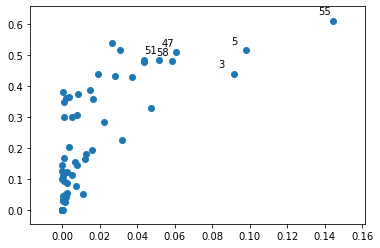

In [141]:
after_percentage = chicago_after.groupby('Violations Number').count()
index = list(map(int, after_percentage._stat_axis.values.tolist()))
after_percentage.index = index
after_percentage = after_percentage.sort_index()
after_percentage = after_percentage.iloc[:, 0]
sum_after_percentage = np.sum(after_percentage)
after_percentage = after_percentage/sum_after_percentage
text = after_percentage._stat_axis.values.tolist()
plt.scatter(after_percentage, after_data)
for j in range(len(after_data)):
    if(after_data[j] >= 0.3):
        if(after_percentage[j+1] >= 0.05):
            plt.annotate(text[j], xy = (after_percentage[j+1], after_data[j]), xytext = (after_percentage[j+1] - 0.008, after_data[j] + 0.02))
plt.show()

In [161]:
important_violation_number_after = ['3', '5', '47', '51', '55', '58']

In [147]:
wordcloud_before = chicago_new[chicago_new['Inspection Date'] < datetime(2018, 7, 1)].copy()
wordcloud_after = chicago_new[chicago_new['Inspection Date'] >= datetime(2018, 7, 1)].copy()

In [142]:
import nltk
from nltk import ngrams
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zhuzhenyu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zhuzhenyu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\zhuzhenyu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [182]:
def word_cloud(data, x, y):
    data = data.values
    data = ''.join(data)
    words = word_tokenize(data)
    filtered_words = [word for word in words if word not in stopwords.words('english')]
    filtered_words = [word for word in filtered_words if word not in stoplist]
    filtered_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    filtered_words = [lemmatizer.lemmatize(word, pos='v') for word in filtered_words]
    
    print(x)

    print(collections.Counter(filtered_words).most_common(20))
    
    
#     for n in range(5):
#         grams = ngrams(data.split(), n)
#         print(collections.Counter(grams).most_common(5))
    
    
    mask_image = np.array(Image.open("chicago.jpg"))
    mask_image[mask_image > 250] = 255

    word_cloud = WordCloud(colormap = "Dark2", background_color='white', mask = mask_image, 
                        width = 1165, height = 607,  max_words=1000, min_font_size = 1, relative_scaling = 0.2).generate(" ".join(filtered_words))
    plt.figure(figsize = (14,20))
    plt.imshow(word_cloud, interpolation="bilinear", cmap = plt.cm.autumn)
    plt.axis('off')
    plt.figure(figsize = (10,6))
    plt.show()
    word_cloud.to_file("word_cloud_" + x +".png" + y)

In [ ]:
import matplotlib.pyplot as plt
from wordcloud.wordcloud import WordCloud
from PIL import Image
import collections 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

stoplist = ['.', ',', '(', ')', 'food']

for x in important_violation_number_before:
    data = wordcloud_before.loc[wordcloud_before["Violations Number"] == x, "Comment"]
    word_cloud(data, x, "before")
    
for x in important_violation_number_after:
    data = wordcloud_after.loc[wordcloud_after["Violations Number"] == x, "Comment"]
    word_cloud(data, x, "after")

**Deleted columns: **

 'Census Tracts',
 'City',
 'Community Areas',
 'Historical Wards 2003-2015',
 'State',
 'Wards',
 'Zip Codes'
 'Location'

## Yelp data

In [ ]:
# # Read in scraped data from yelp
# file_list = ['1-1', '1-2', '3-1', '3-2', '3-3', '4']
# df_list = []

# for file in file_list:
#     yelp_default = read_clean('yelp_by_region/{0}.csv'.format(file)) 
#     df_list.append(yelp_default)

# yelp_default = read_clean('yelp_by_region/{0}.csv'.format('2'))
# yelp_default.drop(['Unnamed: 0'], axis = 1, inplace = True)
# df_list.append(yelp_default)


# combined = pd.concat(df_list, ignore_index=True).drop_duplicates().reset_index(drop=True)
# combined['business_name'] = combined['business_name'].replace({'&amp;' : '&'}, regex = True)
# combined['business_name'] = combined['business_name'].replace({'‘' : '\''}, regex = True)
# combined['business_name'] = combined['business_name'].replace({'’' : '\''}, regex = True)
# combined['categories'] = combined['categories'].replace({'&amp;' : '&'}, regex = True)
# # combined['business_name'] = combined['business_name'].str.replace(r'[^\x00-\x7F]+', '')
# combined['business_name'] = combined['business_name'].apply(lambda x: unidecode.unidecode(x))
# combined.to_csv('yelp.csv')
combined = pd.read_csv('yelp.csv')
yelp = combined.drop(columns=['Unnamed: 0', 'rank'])
yelp.head()

In [ ]:
yelp.shape


## Join Chicago and Yelp by address, name (contains)

In [ ]:
# join by address
# Join by he first four digits in an address only
chicago['A_code'] = chicago['Address'].apply(lambda x: x.split(" ")[0])
yelp['a_code'] = yelp['address'].apply(lambda x: x.split(" ")[0])
join_by_address = chicago.merge(yelp, left_on = 'A_code', right_on = 'a_code')
join_by_address.head()
print(join_by_address.shape)

In [ ]:
# filter by name: aka name contains business name, or business name contains aka name
sim_join_name = join_by_address[join_by_address.apply(lambda x: x['AKA Name'] in x['business_name'] or \
                                                 x['business_name'] in x['AKA Name'], axis = 1)]

def simlarity_join(row):
    A = row['Address'].split(' ')[1]
    a = row['address'].split(' ')[1]
    if len(A) == 1 and len(a) == 1:
        return a == A
    else:
        return True
    
sim_join = sim_join_name[sim_join_name.apply(lambda x: simlarity_join(x), axis = 1)]
sim_join.head()

In [ ]:
print('shape: ', sim_join.shape)
print("According license: ", sim_join['License #'].nunique())
print("According to resturant address: ", sim_join.address.nunique())
print("According to business name: ", sim_join["business_name"].nunique())

In [ ]:
# compare 3583 and 3276 means have the different resturants in the same address
# compare license 5137 and 3583(business_name, address] means have the same resturant but different license? why?
print(sim_join[['business_name', 'address']].drop_duplicates())

In [ ]:
sim_join[['AKA Name', 'Address', 'business_name', 'address']].drop_duplicates().head(500)
# spot some mistakes during merge 43860

In [ ]:
sim_join[sim_join['Facility Type'] == 'Restaurant']['License #'].nunique()

Jimmy John's : fast food chain. multiple sites but with the same address number. 
Subway

## Backup

In [ ]:
# Baseline method
joined = chicago.merge(combined, left_on = 'AKA Name', right_on = 'business_name')
len(joined.business_name)

In [ ]:
# join by the first four digits in an address and the business name
join_type_1 = joined.copy()
join_type_1['A_code_first'] = joined['Address'].apply(lambda x: x.split(" ")[0])
join_type_1['a_code_first'] = joined['address'].apply(lambda x: x.split(" ")[0])
join_type_1 = join_type_1[ (join_type_1['A_code_first'] == join_type_1['a_code_first'])].copy()
join_type_1.drop(['A_code_first', 'a_code_first'], axis=1, inplace=True)
join_type_1.head()
print("shape", join_type_1.shape)
print("According license: ", join_type_1['License #'].nunique())
print("According to resturant address: ", join_type_1.Address.nunique())
print("According to resturant name: ", join_type_1["DBA Name"].nunique())

**Finding: A single address can respond to **

A single address can correspond to a lot of buinesses. One single AKA name on one single address can have different license number. For example, establishment 'loop soup' at address '131 n clinton st'. 

In [ ]:
join_type_1.groupby('Address').count().sort_values(by = 'Inspection ID', ascending = False).head()

In [ ]:
join_type_1[ join_type_1['Address'] == '131 n clinton st' ]

In [ ]:
# join by the list of numbers appeared in an address and the business name
import re
join_type_2 = joined.copy()
join_type_2['A_code'] = joined['Address'].apply(lambda x: tuple(re.findall("\d+", x)) )
join_type_2['a_code'] = joined['address'].apply(lambda x: tuple(re.findall("\d+", x)) )
join_type_2 = join_type_2[(join_type_2['A_code'] == join_type_2['a_code'])]#.drop_duplicates() \
       #[['AKA Name', 'Address', 'business_name', 'address']]
join_type_2.drop(['A_code', 'a_code'], axis=1, inplace=True)
join_type_2.head()
print(join_type_2.shape)
# inspection ID, date, type, result, comment, 